In [160]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime 



In [161]:
#Importando o Dataset

df = pd.read_csv('campeonato-brasileiro-full.csv', parse_dates= ['data'] )


c:\Users\victo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/10/2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\victo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '18/10/2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\victo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19/10/2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\victo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '22/10/2003' in DD/MM/YYYY format. Provide format or specif

In [162]:
#Conferindo Dataset
df.head()

#Retirando colunas de formações e tecnicos

df = df.drop(['formacao_mandante','formacao_visitante','tecnico_mandante','tecnico_visitante'], axis=1)


In [163]:
#verificando dados ausentes
df.isnull().sum()

#Modificando nome Coluna Rodata
df = df.rename(columns = {'rodata':'rodada'})
df.head()






,ID,rodada,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,2003-03-29,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,2003-03-29,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,2003-03-30,16:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR
3,4,1,2003-03-30,16:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA
4,5,1,2003-03-30,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP


In [164]:
#Verificando nomes dos clubes

df['mandante'].unique()
df['visitante'].unique()

#Gremio Prudente e Barueri se referem ao mesmo clube, por isso iremos uni-los com o nome de Barueri

df.loc[df['mandante'] == 'Gremio Prudente', 'mandante'] = 'Barueri'
df.loc[df['visitante'] == 'Gremio Prudente', 'visitante'] = 'Barueri'

assert any(df['visitante'] != 'Gremio Prudente'), 'Houston, we got a problem'
assert any(df['mandante'] != 'Gremio Prudente'), 'Houston, we got a problem'

df.loc[df['vencedor'] == 'Gremio Prudente' , 'vencedor'] = 'Barueri'

assert any(df['vencedor'] != 'Gremio Prudente') , 'Houston, we got a problem'


In [165]:
#Averiguando resultado na coluna vencedor e criando a coluna Clube_vencedor
df['vencedor'].value_counts()

df['Clube_Vencedor'] = df['ID']
df.head()



 




    

,ID,rodada,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,Clube_Vencedor
0,1,1,2003-03-29,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ,1
1,2,1,2003-03-29,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS,2
2,3,1,2003-03-30,16:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,3
3,4,1,2003-03-30,16:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA,4
4,5,1,2003-03-30,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP,5


In [166]:

# A coluna clube_vencedor deve ser categoria e com o seguinte formato:
# 1 - Equipe mandante venceu
# 2 - Equipe visitante venceu
# 3 - Empate

def jogos(a):
    if (a['vencedor'] == a['mandante']):
        return 1
    elif (a['vencedor'] == a['visitante']):
        return 2
    else:
        return 3


df['Clube_Vencedor'] = df.apply(jogos, axis = 1)

   
df.head(15)


,ID,rodada,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,Clube_Vencedor
0,1,1,2003-03-29,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ,1
1,2,1,2003-03-29,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS,1
2,3,1,2003-03-30,16:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,3
3,4,1,2003-03-30,16:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA,3
4,5,1,2003-03-30,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP,3
5,6,1,2003-03-30,16:00,Criciuma,Fluminense,Criciuma,Heriberto Hulse,2,0,SC,RJ,1
6,7,1,2003-03-30,16:00,Juventude,Sao Paulo,-,Alfredo Jaconi,2,2,RS,SP,3
7,8,1,2003-03-30,16:00,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,3
8,9,1,2003-03-30,16:00,Cruzeiro,Sao Caetano,-,Mineirão,2,2,MG,SP,3
9,10,1,2003-03-30,16:00,Vitoria,Figueirense,-,Barradão,1,1,BA,SC,3


In [167]:
#vamos agora verificar se a coluna criada e do tipo categorico

df['Clube_Vencedor'].info()

#Nao esta como categorico, vamos trocar seu tipo

df['Clube_Vencedor'] = df['Clube_Vencedor'].astype('category')

<class 'pandas.core.series.Series'>
RangeIndex: 8025 entries, 0 to 8024
Series name: Clube_Vencedor
Non-Null Count  Dtype
--------------  -----
8025 non-null   int64
dtypes: int64(1)
memory usage: 62.8 KB


In [168]:
#Verificando se a mudança ocorreu de forma correta.

df['Clube_Vencedor'].describe()
df['Clube_Vencedor'].dtype



CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [169]:
#vamos criar uma coluna que contenha somente o ano em que o jogo ocorreu e verificando seu tipo de dado

df['Temporada']= df['data'].dt.year




In [170]:
#Verificando inconsistências de horarios nos jogos

df['hora'].unique()



array(['16:00', '18:00', '21:40', '20:30', '09:00', '15:00', '19:00',
       '17:00', '21:30', '21:45', '18:30', '15:30', '21:50', '18:10',
       '19:30', '16:30', '22:00', '20:00', '00:00', '16:10', '18:20',
       '19:10', '21:00', '21:10', '16:20', '22:50', '18:28', '18:31',
       '20:59', '15:59', '15:58', '16:02', '18:33', '18:32', '16:01',
       '18:29', '18:27', '16:04', '21:01', '22:02', '16:15', '19:31',
       '21:02', '22:03', '19:32', '21:03', '16:03', '18:34', '18:35',
       '19:33', '19:28', '20:56', '21:59', '22:01', '19:29', '19:34',
       '19:37', '20:58', '19:27', '20:27', '20:29', '16:21', '16:24',
       '16:22', '21:04', '21:06', '22:29', '16:19', '16:59', '17:01',
       '17:02', '20:02', '17:03', '16:33', '17:05', '11:00', '11:03',
       '11:02', '10:59', '21:58', '16:32', '11:01', '15:01', '21:05',
       '19:21', '11:04', '17:07', '17:59', '18:03', '18:01', '20:21',
       '18:14', '17:57', '21:47', '21:46', '20:31', '20:34', '19:59',
       '18:02', '19:

In [171]:
#Como visto pelo metodo unique, o horario esta com algumas inconsistências, vamos deixa-lo padrão arredondando de meia em meia hora.


df['hora'] = pd.to_datetime(df['hora'])

df['hora'] = df['hora'].dt.round('30min')

#Verificando como ficou o dataframe

df.info()
df.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                8025 non-null   int64         
 1   rodada            8025 non-null   int64         
 2   data              8025 non-null   datetime64[ns]
 3   hora              8025 non-null   datetime64[ns]
 4   mandante          8025 non-null   object        
 5   visitante         8025 non-null   object        
 6   vencedor          8025 non-null   object        
 7   arena             8025 non-null   object        
 8   mandante_Placar   8025 non-null   int64         
 9   visitante_Placar  8025 non-null   int64         
 10  mandante_Estado   8025 non-null   object        
 11  visitante_Estado  8025 non-null   object        
 12  Clube_Vencedor    8025 non-null   category      
 13  Temporada         8025 non-null   int64         
dtypes: category(1), datetime

,ID,rodada,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,Clube_Vencedor,Temporada
0,1,1,2003-03-29,2023-01-24 16:00:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ,1,2003
1,2,1,2003-03-29,2023-01-24 16:00:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS,1,2003
2,3,1,2003-03-30,2023-01-24 16:00:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,3,2003
3,4,1,2003-03-30,2023-01-24 16:00:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA,3,2003
4,5,1,2003-03-30,2023-01-24 16:00:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP,3,2003
5,6,1,2003-03-30,2023-01-24 16:00:00,Criciuma,Fluminense,Criciuma,Heriberto Hulse,2,0,SC,RJ,1,2003
6,7,1,2003-03-30,2023-01-24 16:00:00,Juventude,Sao Paulo,-,Alfredo Jaconi,2,2,RS,SP,3,2003
7,8,1,2003-03-30,2023-01-24 16:00:00,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,3,2003
8,9,1,2003-03-30,2023-01-24 16:00:00,Cruzeiro,Sao Caetano,-,Mineirão,2,2,MG,SP,3,2003
9,10,1,2003-03-30,2023-01-24 16:00:00,Vitoria,Figueirense,-,Barradão,1,1,BA,SC,3,2003


In [172]:
#Conferindo se deu certo o arredondamento e deixando a coluna com registros somente de horário

df['hora'] = df['hora'].dt.time

#Vamos criar uma coluna com o numero total de gols por jogo

df['Total de Gols'] = df['mandante_Placar'] + df['visitante_Placar']

df.head(6)

# Salvando o arquivo alterado para análises mais específicas. 

df.to_csv('Campeonato_Brasileiro_2.csv')



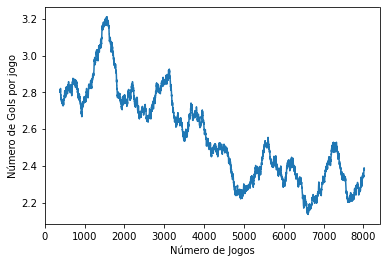

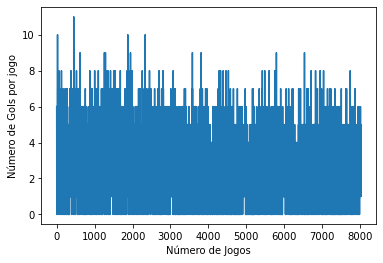

data
2003-12-31          NaN
2004-12-31    -3.643216
2005-12-31    -5.410691
2006-12-31   -29.014473
2007-12-31     1.650485
2008-12-31    -1.146132
2009-12-31     5.700483
2010-12-31   -10.603291
2011-12-31     3.987730
2012-12-31    -7.571288
2013-12-31    -0.425532
2014-12-31    -8.119658
2015-12-31     4.302326
2016-12-31     1.672241
2017-12-31     1.206140
2018-12-31   -10.400867
2019-12-31     5.925030
2020-12-31   -25.342466
2021-12-31    73.088685
2022-12-31   -20.053004
Freq: A-DEC, Name: Total de Gols, dtype: float64


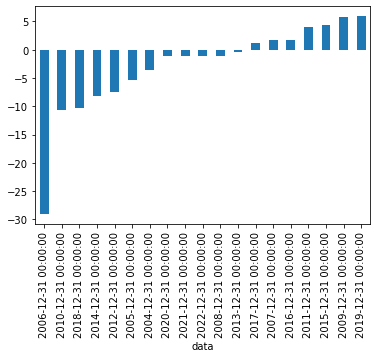

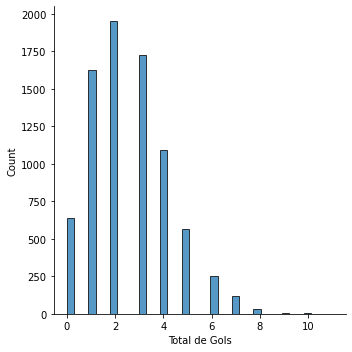

In [173]:

#Média Móvel de Gols por temporada
df['Total de Gols'].rolling( window=380).mean().plot( x= df['Temporada'] , xlabel= 'Número de Jogos', ylabel= 'Número de Gols por jogo')
plt.show()

#Total de gols ao longo do tempo
df['Total de Gols'].plot( xlabel= 'Número de Jogos', ylabel= 'Número de Gols por jogo')
plt.show()

# Porcentagem de variação no número de gols por temporada

pct = df.set_index('data')
pct.head()
pct_change = pct['Total de Gols'].resample('A').sum().pct_change().mul(100)

print(pct_change)
pct_change.iloc[[-1,-2,-3]] = pct_change.median()
pct_change.sort_values().dropna().plot( kind = 'bar')

plt.show()

# Entendendo como se dá a distibuição de total de gols 

sns.displot( df['Total de Gols'] )
plt.show()







